In [ ]:
!pip install pandas transformers sentence-transformers scikit-learn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Load Texts from CSV
def load_texts_from_csv(file_path, text_column):
    """
    Load text data from a specified column in a CSV file.
    :param file_path: Path to the CSV file.
    :param text_column: Name of the column containing text data.
    :return: List of text strings.
    """
    df = pd.read_csv(file_path)
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in the file.")
    return df[text_column].dropna().tolist()

In [ ]:
# Extract Keywords from Texts
def extract_keywords(sentences, n_keywords=10):
    """
    Extract the most frequent keywords from a list of sentences.
    :param sentences: List of text strings.
    :param n_keywords: Number of top keywords to extract.
    :return: List of tuples (word, count).
    """
    # Adjust max_df for smaller datasets to avoid conflicts
    max_df = 0.9 if len(sentences) > 10 else 1.0
    vectorizer = CountVectorizer(stop_words="english", max_df=max_df, min_df=1)
    word_matrix = vectorizer.fit_transform(sentences)
    word_counts = word_matrix.sum(axis=0).A1  # Sum occurrences for each word
    keywords = list(zip(vectorizer.get_feature_names_out(), word_counts))
    return sorted(keywords, key=lambda x: x[1], reverse=True)[:n_keywords]


In [ ]:
# Perform Sentiment Analysis
def perform_sentiment_analysis(texts, max_length=512):
    """
    Perform sentiment analysis with 'positive', 'negative', and 'neutral' classifications.
    :param texts: List of text strings.
    :param max_length: Maximum sequence length for the model.
    :return: List of dictionaries containing text, sentiment, and confidence score.
    """
    sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
    label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}
    results = []
    for text in texts:
        # Truncate text if it exceeds max_length
        if len(text) > max_length:
            text = text[:max_length]
        result = sentiment_analyzer(text)[0] # Get the first element as sentiment_analyzer now returns a list
        results.append({
            "Text": text,
            "Sentiment": label_mapping[result["label"]],
            "Score": result["score"]
        })
    return results

In [ ]:
# Plot Pie Chart for Sentiments
def plot_sentiment_pie(sentiment_results):
    """
    Plot a pie chart for sentiment distribution.
    :param sentiment_results: List of dictionaries containing sentiment results.
    """
    # Extract sentiment labels from the analysis results
    sentiments = [result['Sentiment'] for result in sentiment_results]

    # Count occurrences of each sentiment
    sentiment_counts = Counter(sentiments)
    labels = list(sentiment_counts.keys())
    counts = list(sentiment_counts.values())

    # Plot pie chart
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['yellow', 'green', 'red'])
    plt.title("Sentiment Distribution")
    plt.show()


In [ ]:
# Extract Topics Using SentenceTransformer and Clustering
def extract_topics_with_transformer(texts, n_clusters=5):
    """
    Extract topics as clusters of keywords using SentenceTransformer embeddings and KMeans clustering.
    :param texts: List of text strings.
    :param n_clusters: Number of clusters/topics.
    :return: Dictionary of topics and their keywords.
    """
    # Generate embeddings using SentenceTransformer
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embeddings = model.encode(texts, convert_to_tensor=False)

    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)
    labels = kmeans.labels_

    # Organize clusters
    topics = {f"Topic {i+1}": [] for i in range(n_clusters)}
    for text, label in zip(texts, labels):
        topics[f"Topic {label+1}"].append(text)

    # Extract keywords from each cluster
    topic_keywords = {topic: extract_keywords(sentences) for topic, sentences in topics.items()}
    return topic_keywords


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

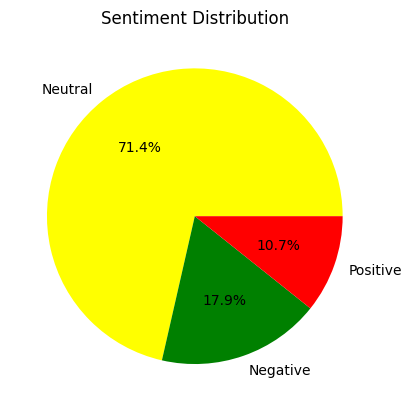


Extracting topics using SentenceTransformer and clustering...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Most Common Topics:
Topic 1: reporting, trend, rates, 2023, data, seasonal, health, component, time, year
Topic 2: data, like, patterns, analysis, factors, months, reporting, significant, trends, year
Topic 3: data, 2024, seasonality, 2023, year, years, reporting, tests, patterns, resource
Topic 4: decline, collection, december, months, 66, 90, 96, challenges, drop, trend
Topic 5: 2023, 2024, december, graph, highlights, months, november, quarter, rates, reporting


In [ ]:
# Execution_Question 2
if __name__ == "__main__":
    # Path to your CSV file and the text column
    file_path = "Q2 interpretations.csv"  # Replace with your file path
    text_column = "Interpretations"  # Replace with your column name

    # Load texts from the CSV file
    texts = load_texts_from_csv(file_path, text_column)

    # Perform sentiment analysis
    sentiment_results = perform_sentiment_analysis(texts)

    # Plot pie chart for sentiment distribution
    plot_sentiment_pie(sentiment_results)

    # Extract topics
    print("\nExtracting topics using SentenceTransformer and clustering...")
    n_clusters = 5  # Number of topics to extract
    topic_keywords = extract_topics_with_transformer(texts, n_clusters=n_clusters)

    # Display topics and their keywords
    print("\nMost Common Topics:")
    for topic, keywords in topic_keywords.items():
        keyword_list = [word for word, _ in keywords]  # Extract only the words
        print(f"{topic}: {', '.join(keyword_list)}")

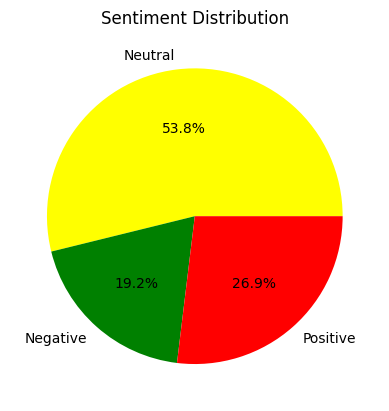


Extracting topics using SentenceTransformer and clustering...


In [ ]:
# Execution_Question 8
if __name__ == "__main__":
    # Path to your CSV file and the text column
    file_path = "Q8 interpretations.csv"  # Replace with your file path
    text_column = "Interpretations"  # Replace with your column name

    # Load texts from the CSV file
    texts = load_texts_from_csv(file_path, text_column)

    # Perform sentiment analysis
    sentiment_results = perform_sentiment_analysis(texts)

    # Plot pie chart for sentiment distribution
    plot_sentiment_pie(sentiment_results)

    # Extract topics
    print("\nExtracting topics using SentenceTransformer and clustering...")
    n_clusters = 5  # Number of topics to extract
    topic_keywords = extract_topics_with_transformer(texts, n_clusters=n_clusters)

    # Display topics and their keywords
    print("\nMost Common Topics:")
    for topic, keywords in topic_keywords.items():
        keyword_list = [word for word, _ in keywords]  # Extract only the words
        print(f"{topic}: {', '.join(keyword_list)}")